In [90]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


%matplotlib inline

np.random.seed(100)

In [91]:
# Import required data
df = pd.read_excel("MPG_data.xlsx")
df.head(5)

,MPG,Cyl,Dis,Hrspwr,Weight,Accel,Yr,Origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [92]:
# Clean and process data
df = df.replace('?', 0)

In [93]:
# Get values from the dataframe to begin the train test split
data_mat = df.values
data_mat.shape

(398, 8)

In [94]:
X = data_mat[:,1:]
y = data_mat[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [95]:
# Normalize the data to account for different units
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [96]:
# Create the Linear Regression Model
lr = LinearRegression()

In [97]:
# Train the Model
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
# Evaluate the Model
y_pred = lr.predict(X_test)
print(f"Predicted Values:{np.round(y_pred[0:5], 2)}")
print(f"Test Values:{y_test[0:5]}")

Predicted Values:[31.5  29.66 20.64 22.97 29.08]
Test Values:[43.4 35.  21.  20.  27. ]


In [99]:
# R squared values for Training and Testing Data
print(f"R-squared for training data: {lr.score(X_train, y_train)}")
print(f"R-squared for test data: {lr.score(X_test, y_test)}")

R-squared for training data: 0.8172497220251792
R-squared for test data: 0.8335114933690133


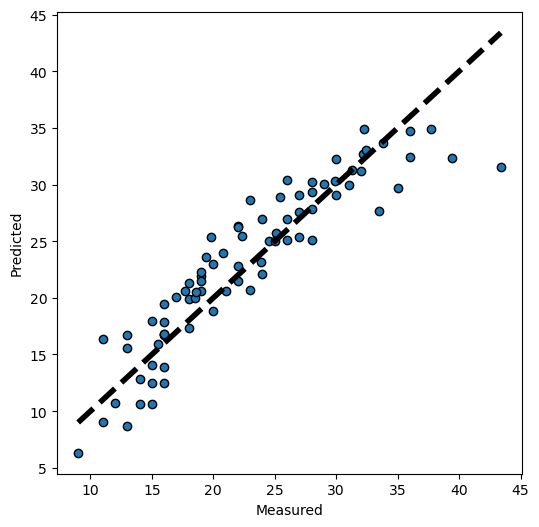

In [100]:
# Graphical Representation of True and Observed for Test Data
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [101]:
# Can make some adjustments to improve the model: Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
Xp = poly.fit_transform(X)
print (Xp.shape) 

(398, 35)


In [102]:
Xp_train, Xp_test, y_train, y_test  = train_test_split(Xp, y, test_size=0.2, random_state=10)

In [103]:
normalizer = MinMaxScaler()
normalizer.fit(Xp_train)
Xpn_train = normalizer.transform(Xp_train)
Xpn_test = normalizer.transform(Xp_test)

In [104]:
# Create Linear Regression Model
from  sklearn.linear_model import LassoCV
linreg = LassoCV(alphas=[  0.01, 0.05, 1.0, 5, 10, 100], max_iter=10000, tol=0.00001)
linreg.fit(Xpn_train, y_train)

LassoCV(alphas=[0.01, 0.05, 1.0, 5, 10, 100], max_iter=10000, tol=1e-05)

In [105]:
#R-squared for training and test
print("R-squared for the training data: ", linreg.score(Xpn_train, y_train))
print ("R-squared for the test data: ", linreg.score(Xpn_test, y_test))

R-squared for the training data:  0.8732700855811895
R-squared for the test data:  0.8395306317971462


Saw a significant increase in the R-squared in the training data, however similar R-squared for the test data.

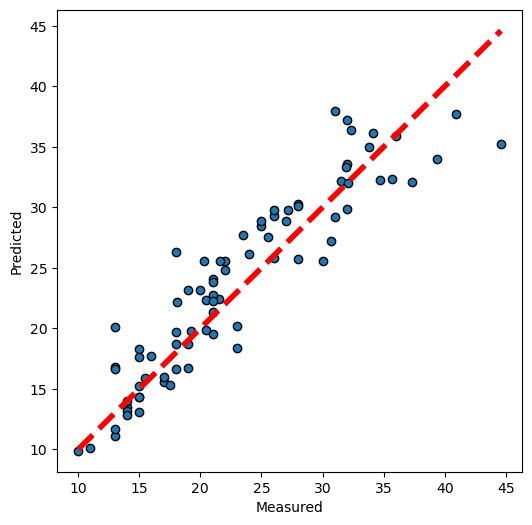

In [106]:
yp_pred = linreg.predict(Xpn_test)
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(y_test, yp_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()